In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn import svm


In [58]:
class protomodel():
    def __init__(self, modeltype):
        self.centroid0 = None
        self.centroid1 = None
        self.modeltype = modeltype
        self.model = None
        
    def fit(self, x_train, y_train):
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        if self.modeltype == "centroid":
            X = np.array([a.flatten() for a in x_train])
            class0 = X[list(np.argwhere(y_train == 0).flatten()),:]
            class1 = X[list(np.argwhere(y_train == 1).flatten()),:]
            self.centroid0 = np.mean(class0, axis = 0)
            self.centroid1 = np.mean(class1, axis = 0)
        elif self.modeltype == "svm":
            X = [a.flatten() for a in x_train]
            self.model = svm.SVC()
            self.model.fit(X, y_train)
        
    def predict(self, x_test):
        x_test = np.array(x_test)
        if self.modeltype == "centroid":
            y_pred  = []
            x_test = [a.flatten() for a in x_test]
            for i in x_test:
                dist0 = distance.euclidean(self.centroid0, i)
                dist1 = distance.euclidean(self.centroid1, i)
                if dist0 <= dist1:
                    y_pred.append(0)
                else:
                    y_pred.append(1)
            return y_pred
        elif self.modeltype == "svm":
            x_test = [a.flatten() for a in x_test]
            return self.model.predict(x_test)
            

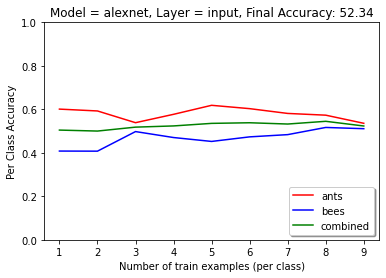

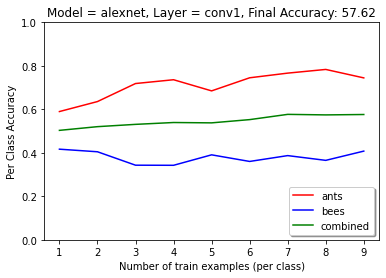

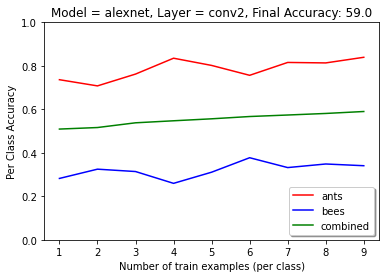

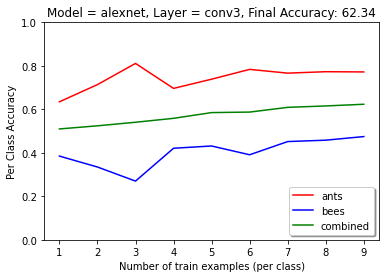

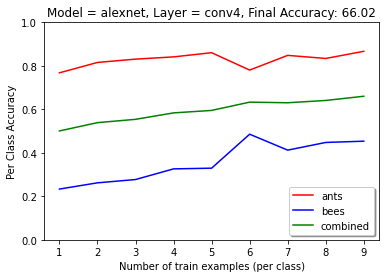

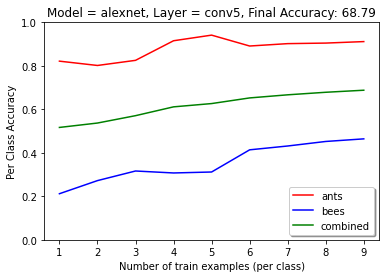

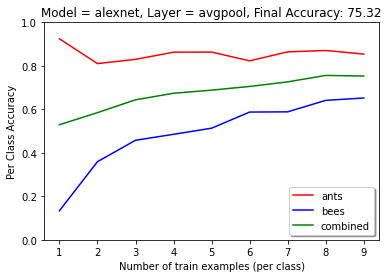

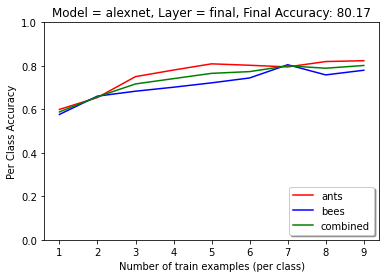

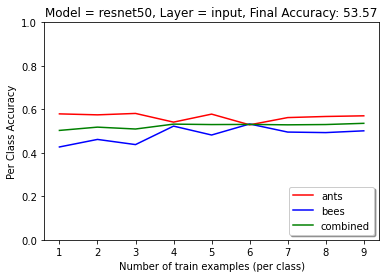

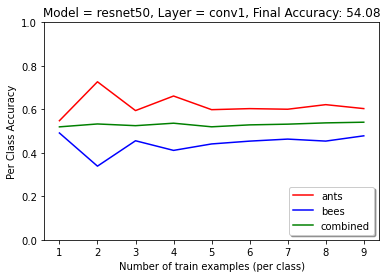

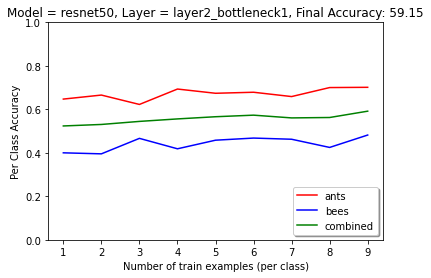

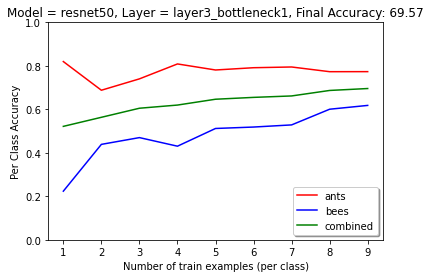

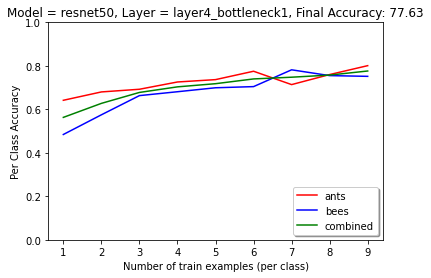

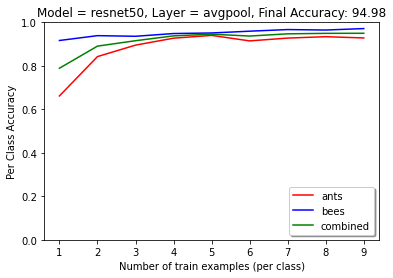

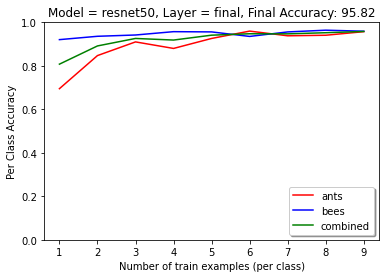

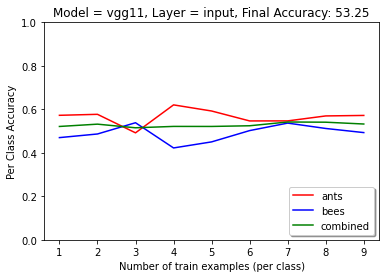

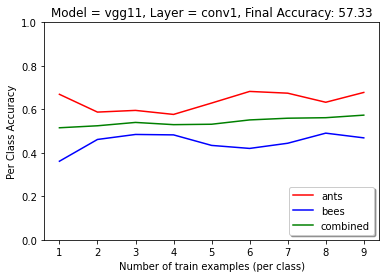

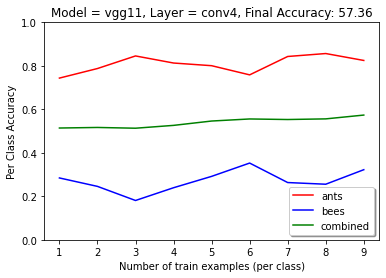

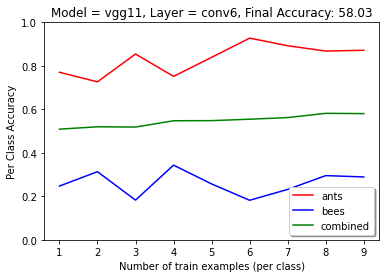

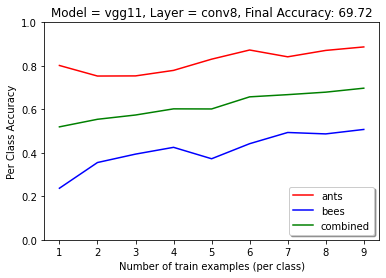

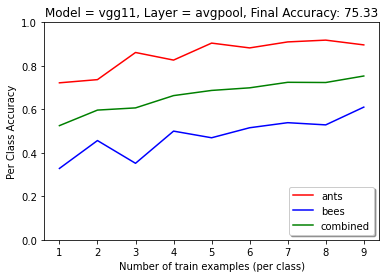

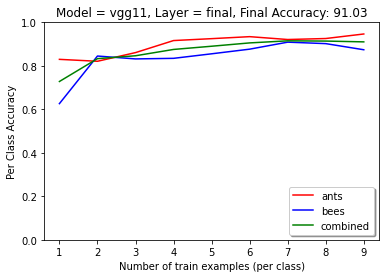

In [192]:
#ANTS 0 AND BEES 1
arcs = ["alexnet", "resnet50", "vgg11"]
#for each model, for each layer, plot per class accuracy vs m where m is the number of examples from each class in train set
for arc in arcs:
    layerdesc = np.load("embeddings/{model}/ants/layer_names.npy".format(model = arc))
    for i, layer in enumerate(layerdesc):
        antacc = []
        beeacc = []
        totalacc = []
        for _ in range(30):
            #print(layer)
            patha = "embeddings/{model}/ants/embeddings.npy".format(model = arc)
            pathb = "embeddings/{model}/bees/embeddings.npy".format(model = arc)
            a = np.load(patha)
            b = np.load(pathb)
            b = b[:a.shape[0],:,:]

            a_acc = []
            b_acc = []
            acc = []
            ms= []
            for m in range(1,10):
                idx = np.random.randint(0,a.shape[0], size = m)
                atrain = a[idx,i,:]
                atest = np.delete(a, idx, axis = 0)
                atest = atest[:,i,:]
                btrain = b[idx,i,:]
                btest = np.delete(b, idx, axis = 0)
                btest= btest[:,i,:]

                xtrain = np.vstack((atrain,btrain))
                xtest = np.vstack((atest,btest))

                ytrain = [0]*atrain.shape[0]+[1]*btrain.shape[0]
                ytest = [0]*atest.shape[0]+[1]*btest.shape[0]

                model = protomodel("centroid")
                model.fit(xtrain, ytrain)
                ypreds = model.predict(xtest)
                #print(ypreds)
                #print(distance.euclidean(model.centroid0, xtest[2]))
                #print(distance.euclidean(model.centroid1, xtest[2]))

                apreds, bpreds = np.split(np.array(ypreds), 2)
                truea, trueb = np.split(np.array(ytest), 2)

                acc.append(np.mean(np.array(ypreds) == np.array(ytest)))
                a_acc.append(np.mean(np.array(apreds) == np.array(truea)))
                b_acc.append(np.mean(np.array(bpreds) == np.array(trueb)))
                ms.append(m)

                antacc.append(a_acc)
                beeacc.append(b_acc)
                totalacc.append(acc)
        

        antacc = np.array(antacc).mean(axis = 0)
        beeacc = np.array(beeacc).mean(axis = 0)
        totalacc = np.array(totalacc).mean(axis = 0)
        
   
        
        final = totalacc[-1]
        
        #print(a_acc)
        #print(b_acc)
        p1 = plt.plot(ms, antacc, 'r-', label="ants")  
        p2 = plt.plot(ms, beeacc, 'b-', label="bees")
        p3 = plt.plot(ms, totalacc, 'g-', label="combined")  
        plt.legend(loc='lower right', fancybox=True, shadow=True)
        plt.xlabel("Number of train examples (per class)")
        plt.ylabel("Per Class Accuracy")
        plt.ylim(0,1)
        plt.title("Model = " + arc + ", Layer = " + layer + ", Final Accuracy: " + str(round(final*100,2)))

        plt.savefig("ants_bees/" + arc + "_" + layer+'.png')  
        plt.show() 
        plt.close()
            

In [132]:
layerdesc = np.load("embeddings/alexnet/sunflowers/layer_names.npy")
print(layerdesc)
patha = "embeddings/alexnet/sunflowers/embeddings.npy"
pathb = "embeddings/alexnet/tulips/embeddings.npy"
a = np.load(patha)
b = np.load(pathb)
b = b[:a.shape[0],:,:]
print(a.shape)
print(b.shape)

['input' 'conv1' 'conv2' 'conv3' 'conv4' 'conv5' 'avgpool' 'final']
(699, 8, 2048)
(699, 8, 2048)


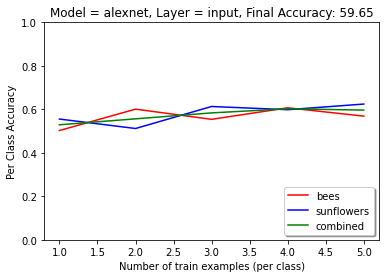

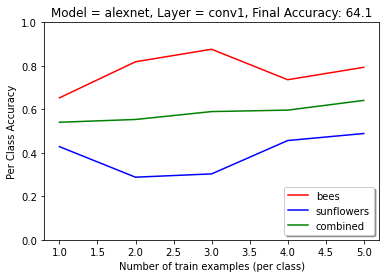

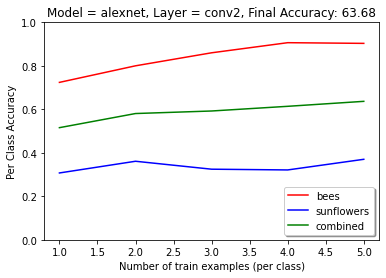

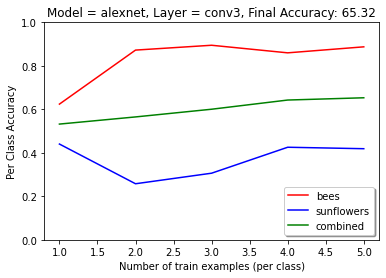

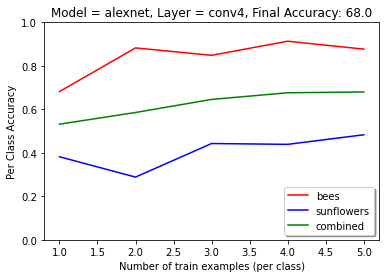

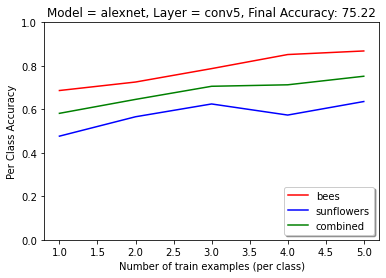

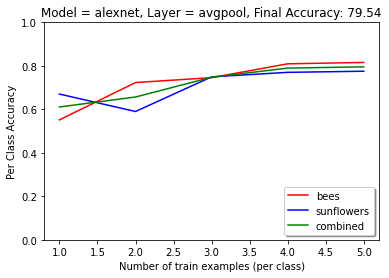

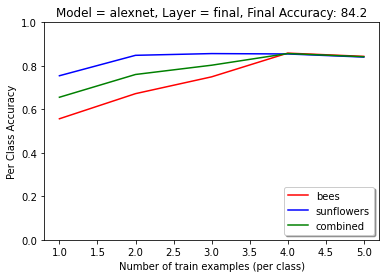

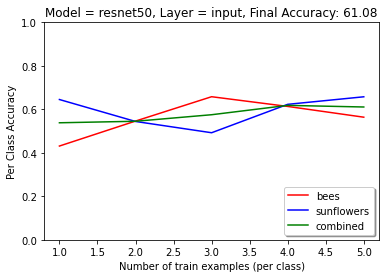

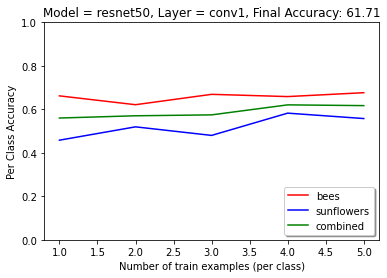

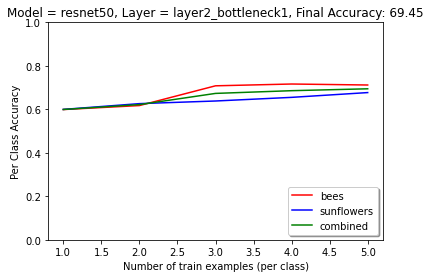

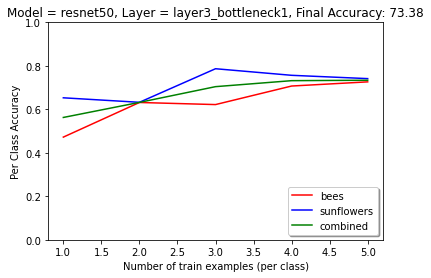

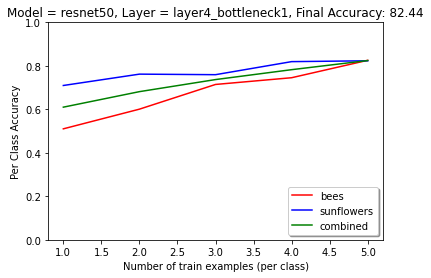

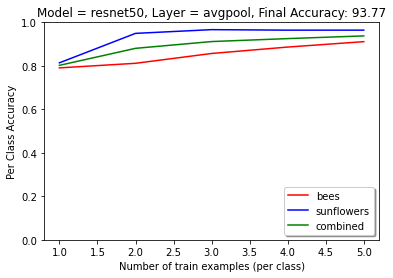

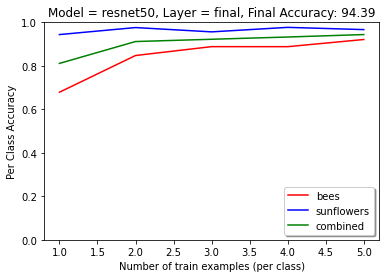

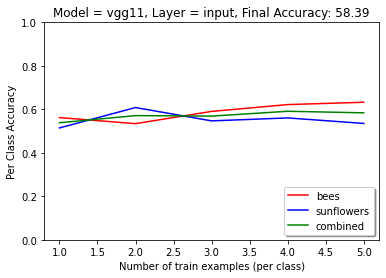

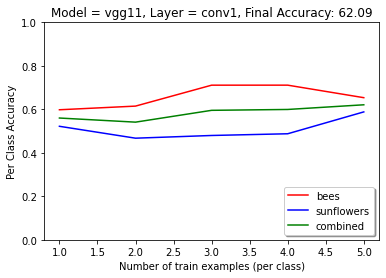

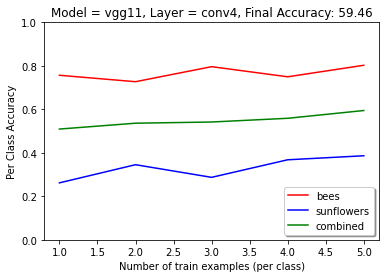

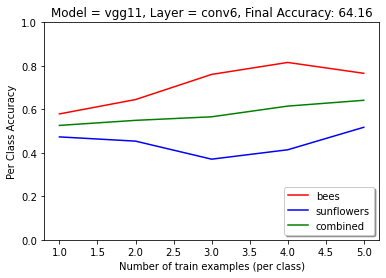

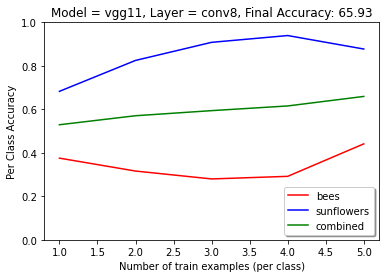

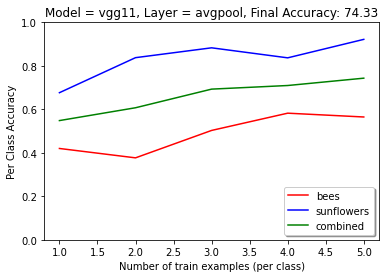

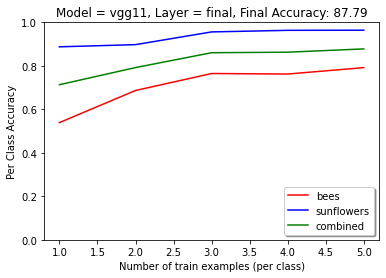

In [198]:
#ROSES 0 V DANDELIONS 1
arcs = ["alexnet", "resnet50", "vgg11"]
#for each model, for each layer, plot per class accuracy vs m where m is the number of examples from each class in train set
for arc in arcs:
    layerdesc = np.load("embeddings/{model}/dandelion/layer_names.npy".format(model = arc))
    for i, layer in enumerate(layerdesc):
        roseacc = []
        dandacc = []
        totalacc = []
        
        for _ in range(30):
            #print(layer)
            paths = "embeddings/{model}/bees/embeddings.npy".format(model = arc)
            patht = "embeddings/{model}/sunflowers/embeddings.npy".format(model = arc)
            s = np.load(paths)
            t = np.load(patht)
            t = t[:s.shape[0],:,:]

            s_acc = []
            t_acc = []
            acc = []
            ms= []
            for m in range(1,6):
                #print("iter" +  str(m))
                idx = np.random.randint(0,s.shape[0], size = m)
                strain = s[idx,i,:]
                stest = np.delete(s, idx, axis = 0)
                stest = stest[:,i,:]
                ttrain = t[idx,i,:]
                ttest = np.delete(t, idx, axis = 0)
                ttest= ttest[:,i,:]

                xtrain = np.vstack((strain,ttrain))
                xtest = np.vstack((stest,ttest))

                ytrain = [0]*strain.shape[0]+[1]*ttrain.shape[0]
                ytest = [0]*stest.shape[0]+[1]*ttest.shape[0]

                model = protomodel("centroid")
                model.fit(xtrain, ytrain)
                ypreds = model.predict(xtest)
                #print(ypreds)
                #print(distance.euclidean(model.centroid0, xtest[2]))
                #print(distance.euclidean(model.centroid1, xtest[2]))

                spreds, tpreds = np.split(np.array(ypreds), 2)
                trues, truet = np.split(np.array(ytest), 2)

                acc.append(np.mean(np.array(ypreds) == np.array(ytest)))
                s_acc.append(np.mean(np.array(spreds) == np.array(trues)))
                #print(s_acc)
                t_acc.append(np.mean(np.array(tpreds) == np.array(truet)))
                ms.append(m)
            roseacc.append(s_acc)
            dandacc.append(t_acc)
            totalacc.append(acc)
        
        #print(np.array(roseacc).shape)
        roseacc = np.array(roseacc).mean(axis = 0)
        dandacc = np.array(dandacc).mean(axis = 0)
        totalacc = np.array(totalacc).mean(axis = 0)
        
        #print(roseacc)
        #print(ms)
        
        final = totalacc[-1]
        p1 = plt.plot(ms, roseacc, 'r-', label="bees")  
        p2 = plt.plot(ms, dandacc, 'b-', label="sunflowers")
        p3 = plt.plot(ms, totalacc, 'g-', label="combined")  
        plt.legend(loc='lower right', fancybox=True, shadow=True)
        plt.xlabel("Number of train examples (per class)")
        plt.ylabel("Per Class Accuracy")
        plt.ylim(0,1)
        plt.title("Model = " + arc + ", Layer = " + layer + ", Final Accuracy: " + str(round(final*100,2)))

        plt.savefig("flowers/" + arc + "_" + layer+'.png')  
        plt.show() 
        plt.close()


In [196]:
alex = []
res = []
vg = []

arcs = ["alexnet", "resnet50", "vgg11"]
inds = [0,-1]

for _ in range(20):
    for arc in arcs:
    #layerdesc = np.load("embeddings/{model}/sunflowers/layer_names.npy".format(model = arc))
    #for i, layer in enumerate(layerdesc):
        #print(layer)
        for i in inds:
            paths = "embeddings/{model}/roses/embeddings.npy".format(model = arc)
            patht = "embeddings/{model}/dandelion/embeddings.npy".format(model = arc)
            s = np.load(paths)
            t = np.load(patht)
            t = t[:s.shape[0],:,:]
            s_acc = []
            t_acc = []
            acc = []
            ms= []
            for m in range(1,5):
                idx = np.random.randint(0,s.shape[0], size = m)
                strain = s[idx,i,:]
                stest = np.delete(s, idx, axis = 0)
                stest = stest[:,i,:]
                ttrain = t[idx,i,:]
                ttest = np.delete(t, idx, axis = 0)
                ttest= ttest[:,i,:]

                xtrain = np.vstack((strain,ttrain))
                xtest = np.vstack((stest,ttest))

                ytrain = [0]*strain.shape[0]+[1]*ttrain.shape[0]
                ytest = [0]*stest.shape[0]+[1]*ttest.shape[0]

                model = protomodel("centroid")
                model.fit(xtrain, ytrain)
                ypreds = model.predict(xtest)
                #print(ypreds)
                #print(distance.euclidean(model.centroid0, xtest[2]))
                #print(distance.euclidean(model.centroid1, xtest[2]))

                spreds, tpreds = np.split(np.array(ypreds), 2)
                trues, truet = np.split(np.array(ytest), 2)

                acc.append(np.mean(np.array(ypreds) == np.array(ytest)))
                s_acc.append(np.mean(np.array(spreds) == np.array(trues)))
                t_acc.append(np.mean(np.array(tpreds) == np.array(truet)))
                ms.append(m)


            final = acc[-1]
            
            if arc == "alexnet":
                alex.append(final)
            elif arc == "resnet50":
                res.append(final)
            else:
                vg.append(final)

print(alex)
print(res)
print(vg)
        
        

[0.5690737833594977, 0.8744113029827315, 0.5282574568288854, 0.847723704866562, 0.5047095761381476, 0.9230769230769231, 0.5416012558869702, 0.8053375196232339, 0.6397174254317112, 0.8744113029827315, 0.5949764521193093, 0.858712715855573, 0.49921507064364207, 0.9395604395604396, 0.5659340659340659, 0.890894819466248, 0.6357927786499215, 0.9544740973312402, 0.5368916797488226, 0.6020408163265306, 0.6130298273155416, 0.8194662480376766, 0.5392464678178964, 0.9160125588697017, 0.5510204081632653, 0.9403453689167975, 0.5839874411302983, 0.8979591836734694, 0.5180533751962323, 0.7919937205651492, 0.640502354788069, 0.8916797488226059, 0.5620094191522763, 0.8971742543171115, 0.6153846153846154, 0.9152276295133438, 0.5572998430141287, 0.8736263736263736, 0.6514913657770801, 0.9379905808477237]
[0.7009419152276295, 0.9654631083202512, 0.6036106750392465, 0.9387755102040817, 0.630298273155416, 0.9152276295133438, 0.5384615384615384, 0.868916797488226, 0.5635792778649922, 0.8877551020408163, 0.6

In [167]:
alexi = np.array(alex[::2])
alexf = np.array(alex[1::2])
print("Alexnet mean accuracies: input= {}, final= {} ".format(alexi.mean(), alexf.mean()))

resi = np.array(res[::2])
resf = np.array(res[1::2])
print("Resnet mean accuracies: input= {}, final= {} ".format(resi.mean(), resf.mean()))

vgi = np.array(vg[::2])
vgf = np.array(vg[1::2])

print("VGG mean accuracies: input= {}, final= {} ".format(vgi.mean(), vgf.mean()))

Alexnet mean accuracies: input= 0.5639324960753533, final= 0.871397198860253 
Resnet mean accuracies: input= 0.5661302982731555, final= 0.9264199470480259 
VGG mean accuracies: input= 0.5734301412872841, final= 0.8759155868761779 


In [161]:
paths = "embeddings/{model}/dandelion/embeddings.npy".format(model = arc)
patht = "embeddings/{model}/roses/embeddings.npy".format(model = arc)
s = np.load(paths)
t = np.load(patht)
print(s.shape)
print(t.shape)

(898, 7, 2048)
(641, 7, 2048)


In [145]:
for arc in arcs: 
    layerdesc = np.load("embeddings/{model}/sunflowers/layer_names.npy".format(model = arc))
    print(layerdesc)

['input' 'conv1' 'conv2' 'conv3' 'conv4' 'conv5' 'avgpool' 'final']
['input' 'conv1' 'layer2_bottleneck1' 'layer3_bottleneck1'
 'layer4_bottleneck1' 'avgpool' 'final']
['input' 'conv1' 'conv4' 'conv6' 'conv8' 'avgpool' 'final']
